In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_generator import Datagen
from feedforward_network import FeedForwardNet
from residual_network import ResidualNet
from terminal_unicycle import FeedforwardUnicycle, ResidualUnicycle
from ddp_solver import solve_problem
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils import plot_trajectories

In [3]:
net1 = torch.load("./Fnet/net1.pth")

net2 = torch.load("./Fnet/net2.pth")

net3 = torch.load("./Fnet/net3.pth")
net4 = torch.load("./Fnet/net4.pth")
net5 = torch.load("./Fnet/net5.pth")
net6 = torch.load("./Fnet/net6.pth")
net7 = torch.load("./Fnet/net7.pth")
net8 = torch.load("./Fnet/net8.pth")
net9 = torch.load("./Fnet/net9.pth")
net10 = torch.load("./Fnet/net10.pth")

net11 = torch.load("./Fnet/net11.pth")
net12 = torch.load("./Fnet/net12.pth")
net13 = torch.load("./Fnet/net13.pth")
net14 = torch.load("./Fnet/net14.pth")
net15 = torch.load("./Fnet/net15.pth")


net16 = torch.load("./Fnet/net16.pth")
net17 = torch.load("./Fnet/net17.pth")
net18 = torch.load("./Fnet/net18.pth")
net19 = torch.load("./Fnet/net19.pth")
net20 = torch.load("./Fnet/net20.pth")

<Figure size 432x288 with 0 Axes>

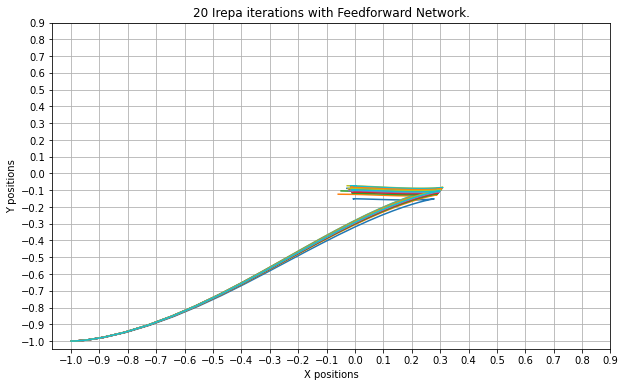

In [112]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

neural_nets = [net1, net2, net3, net4, 
              net5,net6, net7, net8,
              net9, net10, net11, net12,
              net13, net14,net15, net16, net17, net18, net19, net20]




for neural_net in neural_nets:
    position = np.array([-1, -1, 0])
    terminal_model = FeedforwardUnicycle(neural_net)
    ddp = solve_problem(initial_configuration=position,
                       terminal_model=terminal_model,
                       precision=1e-6)
    
    xs_ = np.array(ddp.xs)
    xs  = xs_[:,0:2]

    ax.plot(xs[:,0], xs[:,1])
    
ax.set_xticks(np.arange(-1., 1, step=0.1))
ax.set_yticks(np.arange(-1., 1, step=0.1))
ax.grid()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("20 Irepa iterations with Feedforward Network.")
plt.savefig("3.png")

<Figure size 432x288 with 0 Axes>

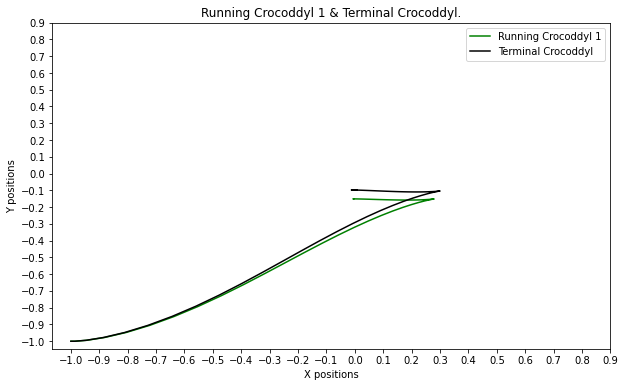

In [17]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

position = np.array([-1, -1, 0.])

terminal_model = FeedforwardUnicycle(net1)
ddp1 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model,
                   precision=1e-6)

xs_1 = np.array(ddp1.xs)
xs1  = xs_1[:,0:2]

terminal_model2 = FeedforwardUnicycle(net20)
ddp2 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model2,
                   precision=1e-6)

xs_2 = np.array(ddp2.xs)
xs2  = xs_2[:,0:2]



ax.plot(xs1[:,0], xs1[:,1], c = 'green', label = "Running Crocoddyl 1")
ax.plot(xs2[:,0], xs2[:,1], c = 'black', label = "Terminal Crocoddyl")

    
ax.set_xticks(np.arange(-1, 1, step=0.1))
ax.set_yticks(np.arange(-1, 1, step=0.1))
#ax.grid()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("Running Crocoddyl 1 & Terminal Crocoddyl.")
ax.legend()

In [19]:
# Value functions

def values_traj(net, dataset):
    values = []
    traj = []
    for data in dataset:
        terminal_model = FeedforwardUnicycle(net)
        ddp = solve_problem(initial_configuration=data,
                           terminal_model=terminal_model)
        values.append(ddp.cost)
        xs_ = np.array(ddp.xs)
        xs = xs_[:,0:2]
        traj.append(xs)
    return values, traj



            

In [20]:
data_circle = Datagen.circular_data()

v1,t1 = values_traj(net1, data_circle)
v5,t5 = values_traj(net5, data_circle) 
v10,t10 = values_traj(net10, data_circle) 
v15,t15 = values_traj(net15, data_circle) 
v20,t20 = values_traj(net20, data_circle) 

 Returning 100 points from the circumference of a circle of radii [2]


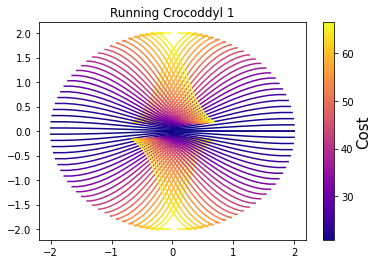

In [22]:
plot_trajectories(value=v1, xs=t1, name="Cost", title="Running Crocoddyl 1")


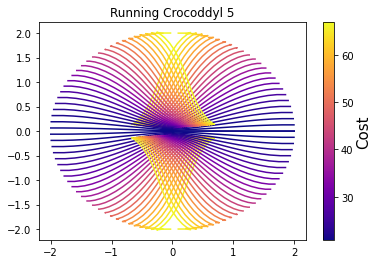

In [23]:
plot_trajectories(value=v5, xs=t5, name="Cost", title="Running Crocoddyl 5")


In [115]:
plot_trajectories(value=v10, xs=t10, name="Cost", title="Running Crocoddyl 10")


ValueError: Invalid RGBA argument: array([[0.993851, 0.759304, 0.159092, 1.      ]])

<Figure size 432x288 with 2 Axes>

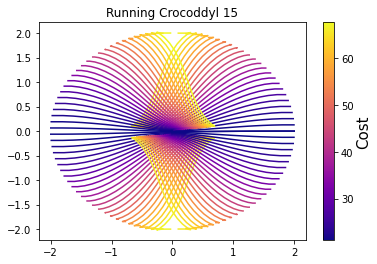

In [25]:
plot_trajectories(value=v15, xs=t15, name="Cost", title="Running Crocoddyl 15")

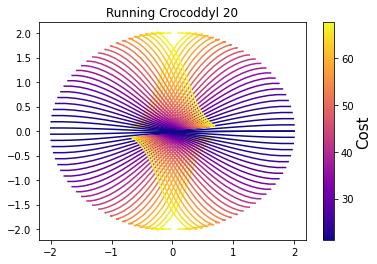

In [26]:
plot_trajectories(value=v20, xs=t20, name="Cost", title="Running Crocoddyl 20")

In [61]:
data_grid = Datagen.grid_data(size=30, limits=[-1,1])


In [62]:
def value_data(positions, net):
    terminal_model = FeedforwardUnicycle(net)
    y_data = []
    
    for position in positions:
        ddp = solve_problem(terminal_model = terminal_model,
                            initial_configuration = position,
                            horizon   = 100,
                            precision = 1e-6,
                            maxiters  = 1000,
                            state_weight = 1,
                            control_weight = 1
                           )
            
            
            
        y_data.append(ddp.cost)
            
                
    y_data = np.array(y_data).reshape(-1,1)
    return y_data

In [63]:
v1 = value_data(data_grid, net1)

In [66]:
v5 = value_data(data_grid, net5)
v10 = value_data(data_grid, net10)
v15 = value_data(data_grid, net15)
v20 = value_data(data_grid, net20)

<Figure size 432x288 with 0 Axes>

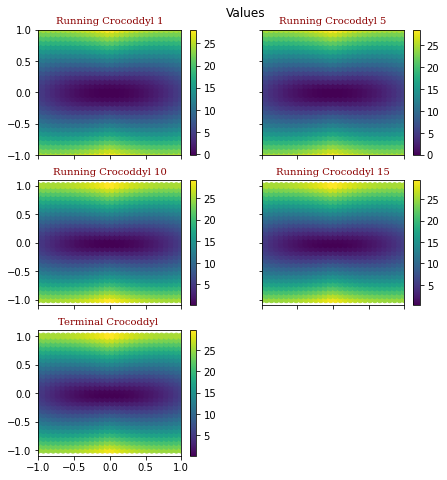

In [111]:
plt.clf()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

# Make the figure:

fig, axs = plt.subplots(3, 2, figsize=(6, 8), sharex=True, sharey ='row')
fig.subplots_adjust(left=0.02, bottom=0.2, right=0.95, top=0.94, wspace=0.25)
fig.suptitle("Values")

im1 = axs[0, 0].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v1)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v5)
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v10)
fig.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v15)
fig.colorbar(im4, ax=axs[1, 1])


im5 = axs[2, 0].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v20)
fig.colorbar(im5, ax=axs[2, 0])


axs[2,1].axis('off')



axs[0, 0].set_title("Running Crocoddyl 1", font)
axs[0, 1].set_title("Running Crocoddyl 5", font)

axs[1, 0].set_title("Running Crocoddyl 10", font)
axs[1, 1].set_title("Running Crocoddyl 15", font)
axs[2, 0].set_title("Terminal Crocoddyl ", font)

axs[0,0].set_xlim(-1, 1)
axs[0,0].set_ylim(-1, 1)
plt.savefig("values.png")

<Figure size 432x288 with 0 Axes>

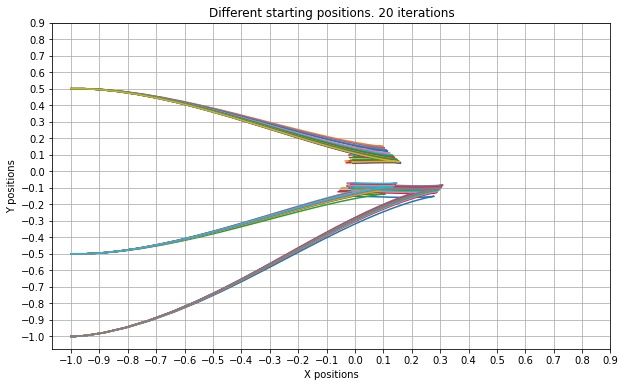

In [110]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

neural_nets = [net1, net2, net3, net4, 
              net5,net6, net7, net8,
              net9, net10, net11, net12,
              net13, net14,net15, net16,
              net17, net18, net19, net20]




for neural_net in neural_nets:
    position = np.array([[-1, -1, 0],
                         [-1, 0.5, 0],
                         [-1, -0.5, 0]])
    
    for pos in position:
        
        terminal_model = FeedforwardUnicycle(neural_net)
        ddp = solve_problem(initial_configuration=pos,
                           terminal_model=terminal_model,
                           precision=1e-6)

        xs_ = np.array(ddp.xs)
        xs  = xs_[:,0:2]

        ax.plot(xs[:,0], xs[:,1])
    
ax.set_xticks(np.arange(-1., 1, step=0.1))
ax.set_yticks(np.arange(-1., 1, step=0.1))
ax.grid()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("Different starting positions. 20 iterations")
plt.savefig('fig2.png')

<Figure size 432x288 with 0 Axes>

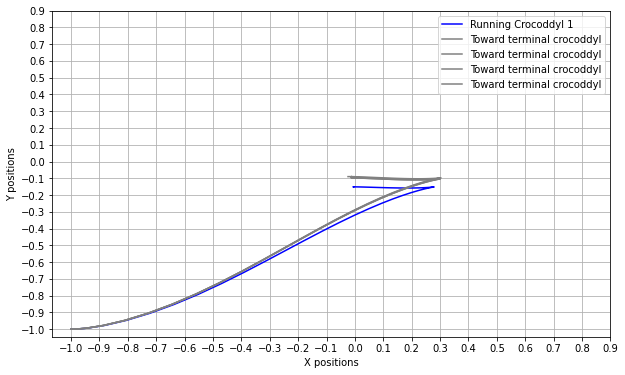

In [108]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

nets_s = [net1]
nets_t = [net17, net18, net19, net20]



for net in nets_s:
    position = np.array([-1, -1, 0])
    terminal_model = FeedforwardUnicycle(net)
    ddp = solve_problem(initial_configuration=position,
                       terminal_model=terminal_model,
                       precision=1e-6)

    xs_ = np.array(ddp.xs)
    xs  = xs_[:,0:2]

    ax.plot(xs[:,0], xs[:,1], c='blue', label="Running Crocoddyl 1")
    
    
for net in nets_t:
    position = np.array([-1, -1, 0])
    terminal_model = FeedforwardUnicycle(net)
    ddp = solve_problem(initial_configuration=position,
                       terminal_model=terminal_model,
                       precision=1e-6)

    xs_ = np.array(ddp.xs)
    xs  = xs_[:,0:2]

    ax.plot(xs[:,0], xs[:,1], c='grey', label="Toward terminal crocoddyl")

ax.set_xticks(np.arange(-1., 1, step=0.1))
ax.set_yticks(np.arange(-1., 1, step=0.1))
ax.grid()
ax.legend()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
plt.savefig("fig1.png")

Text(0, 0.5, 'Y positions')

<Figure size 432x288 with 0 Axes>

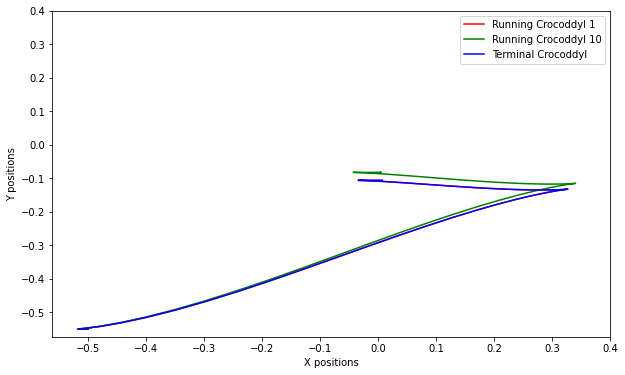

In [106]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))



position = np.array([-0.5, -.55, 0])
terminal_model1 = FeedforwardUnicycle(net1)
ddp1 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model,
                   precision=1e-6)
xs_1 = np.array(ddp1.xs)
xs1  = xs_1[:,0:2]


terminal_model2 = FeedforwardUnicycle(net10)
ddp2 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model2,
                   precision=1e-6)

xs_2 = np.array(ddp2.xs)
xs2  = xs_2[:,0:2]



terminal_model3 = FeedforwardUnicycle(net20)
ddp3 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model3,
                   precision=1e-6)

xs_3 = np.array(ddp3.xs)
xs3  = xs_3[:,0:2]



ax.plot(xs1[:,0], xs1[:,1], c='red', label="Running Crocoddyl 1")
ax.plot(xs2[:,0], xs2[:,1], c='green', label="Running Crocoddyl 10")
ax.plot(xs3[:,0], xs3[:,1], c='blue', label="Terminal Crocoddyl")


ax.set_xticks(np.arange(-0.5, .5, step=0.1))
ax.set_yticks(np.arange(-.5, .5, step=0.1))
ax.legend()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")


In [ ]:
We also try to augment Crocoddyl by adding Hamilton Jacobi Bellman contraints
such that the ddp formulation of the problem satifies the stochastic Hamilton-Jacobi-Bellman (HJB) equation, 
effectively turning the problem into an infinite horizon problem.
In this approach, we first build an offline database of optimal trajectories and subsequently use it to learn an 
approximation of the value function(i.e optimal cost) for any given initial state.
Our initial experiments, based on simple systems like unicycle, show that 
the learned value function indeed converges to a global optimum.